<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/Faatimah_'fresh'_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1Tkiy1Gvc4Ce0L3qiHKUAvkttcWkGMU8O)

                                                                      Image source:





# **Sendy Explore Competition - Regression Analysis** 

Team 2 - Mangaliso Samuel Makhoba, Bryan Green, Michael Ilic, Lawrence Hlapa, Faatimah Mansoor 

**The structure of this notebook is as follows:**

1 Introduction

2 Body

3 Conclusion 

4 References and links

##**1 Introduction**

Sendy is a logistic company in Kenya. The aim of this project is to build a regression model for Sendy which can accurately predict delivery time, from the time a package is picked up to its arrival at the final destination.

To build this model, the Train dataset and the riders dataset will used. Regression models will be trained, and the most suitable will be selected. This model will then be used to predict delivery time for the test dataset 

**Variable to be predicted(y):** Time_from_Pickup_to_Arrival

**Independent variables(X)**:




##**2 Body**

###2.1 Import modules

In [0]:
#import modules 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###2.2 Import dataset

In [0]:
#if using google colab,run this cell to import data 
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

In [0]:
#if using jupyter notebook, run this cell to import data
train = pd.read_csv('Train.csv') #training set
test = pd.read_csv('Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('Riders.csv') #riders info
variable_def = pd.read_csv('VariableDefinitions.csv')
sample = pd.read_csv('SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

###2.3 EDA

**Variable** **definitions**

In [0]:
variable_def

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


**Riders EDA**

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [0]:
riders.isnull().sum(axis = 0) #number of nulls per column 

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

**Train EDA**

In [0]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [0]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [0]:
train.isnull().sum(axis = 0) #number of nulls per column

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
#percentage of Nan values:
temp =round((train.isnull().sum(axis = 0)['Temperature']/21201)*100,2)
precip = round((train.isnull().sum(axis = 0)['Precipitation in millimeters']/21201)*100,2)
print(temp,'% of missing values in temp column')
print(precip,'% of missing values in precipitation column')

20.59 % of missing values in temp column
97.4 % of missing values in precipitation column


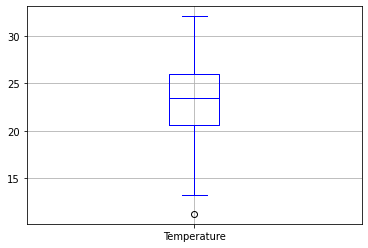

In [0]:
#understanding temperature data
train.boxplot(['Temperature'], color = 'blue')
plt.show()

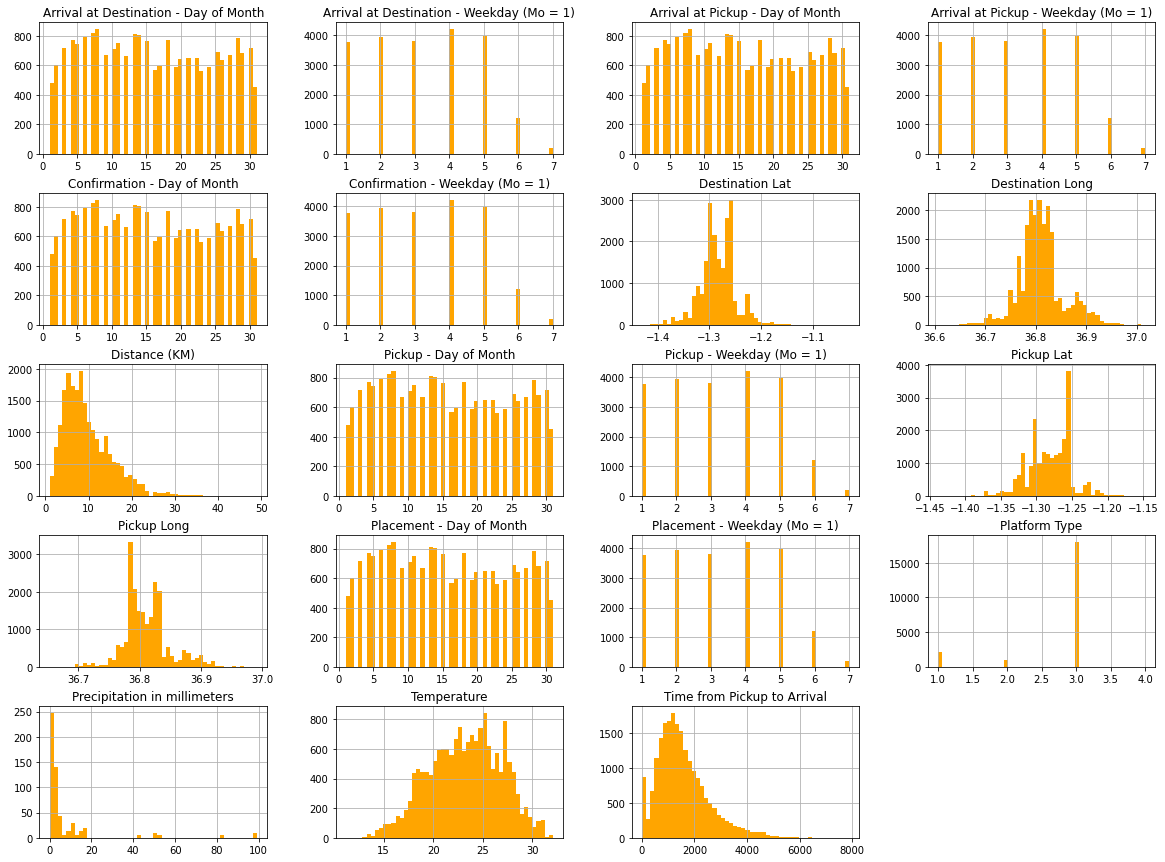

In [0]:
#plotting distributions of all the variables in train
train.hist(bins=50, figsize=(20,15), color = 'orange')
plt.show()

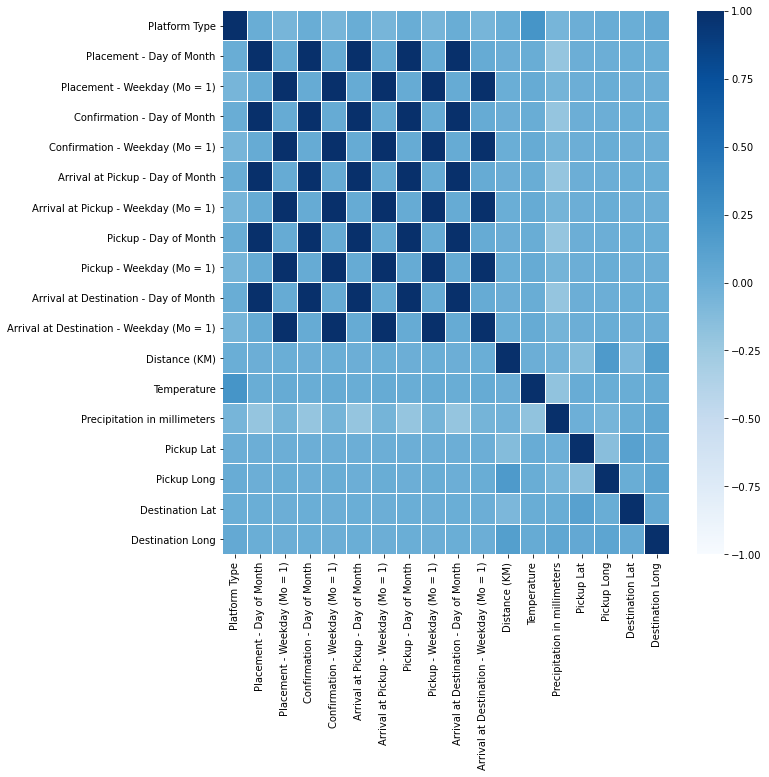

In [0]:
#plotting correlation heat map for predictor variable in train 
train_variables = train.drop(['Time from Pickup to Arrival'], axis =1)
train_kor = train_variables.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='Blues', linewidth=0.1)

In [0]:
#visualising pick-up locations on a street map 
px.scatter_mapbox(train, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'Oranges', 
                     mapbox_style = 'open-street-map',
                     title = 'pick up location')

**Test data**

In [0]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
print('test contains')
print('No. of rows:', test.shape[0])
print('No. of columns:', test.shape[1])

test contains
No. of rows: 7068
No. of columns: 25


In [0]:
if train.column not in test.column:
  print train.column

###2.3 Data preprocessing

In [0]:
#create a function for removing spaces in column name 
def col_names_without_spaces(df):
  df.columns = [col.replace(" ","_") for col in df.columns] 
  return df 

In [0]:
col_names_without_spaces(riders)
riders.head(1)

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159


In [0]:
col_names_without_spaces(train)
train.head(1)

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745


In [0]:
#working with riders 
def riders_df_func(df):
  df['Age'] = round(df['Age']/52,) # age is in weeks 
  df = df.drop(columns=['No_of_Ratings']) # there's a relationship, ave rating= rating/no of ratings
  return df 

In [0]:
riders = riders_df_func(riders)
riders.head(1)

,Rider_Id,No_Of_Orders,Age,Average_Rating
0,Rider_Id_396,2946,44.0,14.0


In [0]:
#declaring variables 
X_temp = train.drop(['Time_from_Pickup_to_Arrival'], axis=1)
y = train['Time_from_Pickup_to_Arrival']

In [0]:
#function for working with X_temp, remove time from pickup to arrival, this still needs work for lat/long data and adding some times
def cleaning_up_train(df):
    df = df.drop(columns=['Order_No',
                          'User_Id',
                          'Vehicle_Type',
                          'Placement_-_Day_of_Month',
                          'Placement_-_Weekday_(Mo_=_1)',
                          'Confirmation_-_Day_of_Month',
                          'Confirmation_-_Weekday_(Mo_=_1)',
                          'Arrival_at_Pickup_-_Day_of_Month',
                          'Arrival_at_Pickup_-_Weekday_(Mo_=_1)',
                          'Pickup_-_Day_of_Month',
                          'Pickup_-_Weekday_(Mo_=_1)',
                          'Pickup_-_Time',
                          'Arrival_at_Destination_-_Time',
                          'Arrival_at_Destination_-_Day_of_Month',
                          'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
                          'Precipitation_in_millimeters',
                          'Placement_-_Time',
                          'Confirmation_-_Time',
                          'Arrival_at_Pickup_-_Time'],axis = 1)
    df['Distance_(m)'] = df['Distance_(KM)']*1000
    df = df.drop(columns = ['Distance_(KM)'], axis =1) 
    df = df.drop(columns =['Pickup_Lat','Destination_Lat','Pickup_Long','Destination_Long'], axis =1)
    return df 

In [0]:
train = cleaning_up_train(X_temp)
train.head()

,Platform_Type,Personal_or_Business,Temperature,Rider_Id,Distance_(m)
0,3,Business,20.4,Rider_Id_432,4000
1,3,Personal,26.4,Rider_Id_856,16000
2,3,Business,NaN,Rider_Id_155,3000
3,3,Business,19.2,Rider_Id_855,9000
4,1,Personal,15.4,Rider_Id_770,9000


In [0]:
train = pd.merge(train, riders, on= 'Rider_Id')
train.head(1)

,Platform_Type,Personal_or_Business,Temperature,Rider_Id,Distance_(m),No_Of_Orders,Age,Average_Rating
0,3,Business,20.4,Rider_Id_432,4000,1637,25.0,13.8


In [0]:
#dropping cols in 'final' df
def final_df_after_merge(df):
  df['Age'] = round(df['Age']/52,) # age is in weeks 
  df = df.drop(columns=['Rider_Id']) 
  return df 

In [0]:
X = final_df_after_merge(train)
X.head()

,Platform_Type,Personal_or_Business,Temperature,Distance_(m),No_Of_Orders,Age,Average_Rating
0,3,Business,20.4,4000,1637,0.0,13.8
1,3,Personal,24.5,20000,1637,0.0,13.8
2,3,Business,24.7,6000,1637,0.0,13.8
3,3,Personal,15.2,18000,1637,0.0,13.8
4,2,Personal,19.2,7000,1637,0.0,13.8


In [0]:
#temp needs to be imputed 
X['Temperature'] = X['Temperature'].fillna(X['Temperature'].mean())

In [0]:
#encoding categorical variables 
X = pd.get_dummies(X, columns= ['Platform_Type','Personal_or_Business'],prefix= ['Platform_type','Business_type'], drop_first= True )
X.head(1)

,Temperature,Distance_(m),No_Of_Orders,Age,Average_Rating,Platform_type_2,Platform_type_3,Platform_type_4,Business_type_Personal
0,20.4,4000,1637,0.0,13.8,0,1,0,0


###2.4 Modelling 

In [0]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

#### 2.4.1 Multiple Linear regression

##### 2.4.1.1 Multiple linear regression 

In [0]:
#Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting the Test set results
y_pred_reg = regressor.predict(X_test)

In [0]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
Multiple_linear_regression = r2_score(y_test, y_pred_reg)
Multiple_linear_regression

4.3115679126737305e-05

#####2.4.1.2 Multiple linear regression with ridge and lasso

In [0]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)


Ridge 

In [0]:
# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
# create ridge model
ridge = Ridge()
# train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
#Predicting the Test set results
test_ridge = ridge.predict(X_test)

In [0]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
Ridge_regression = r2_score(y_test, test_ridge)
Ridge_regression

-0.0007142130700668048

Lasso 

In [0]:
# import LASSO module
from sklearn.linear_model import Lasso
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
# train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#Predicting the Test set results
test_lasso = ridge.predict(X_test)

In [0]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
lasso_regression = r2_score(y_test, test_lasso)
lasso_regression

-0.0007142130700668048

In [0]:
# make training set predictions for each model#
train_lm_reg = regressor.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [0]:
# make test set predictions for each model
test_lm_reg = regressor.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [0]:
from sklearn import metrics
# dictionary of results
results_dict = {'Training MSE':
                    {
                        
                        "Least Squares, Lin_reg": metrics.mean_squared_error(y_train, train_lm_reg),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                    
                        "Least Squares, Lin_reg": metrics.mean_squared_error(y_test, test_lm_reg),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [0]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
# view the results
results_df

,Training MSE,Test MSE
"Least Squares, Lin_reg",1.404378e+06,1.048031e+06
Ridge,9.854380e+05,9.288361e+05
LASSO,9.854380e+05,9.288335e+05


####2.4.2 Polynominal regression 

In [0]:
#Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

In [0]:
#Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))

In [0]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [0]:
For each model, plot predicted vs expected- use this to decide 

###2.5. Model Selection

In [0]:
Final decision:
create a df with all the models and the r2 values 
select the one with the best r2 and use it to predict from the testing df
Also check Assess model accuracy in variable selection train 

###2.6 Using the model on test

In [0]:
all transformations to be done on testing df 

In [0]:
Predict y based on model, output a df for competition that has order no, and time from pick-up to arrival 

###2.7 Function to be placed in API  

##**3 Conclusion** 

##**4 References and links**

Trello board

Github

API

Google drive presentation slides 